In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None), xticks=None):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    if xticks is None:
        plt.xticks(fontsize = font['size'], fontname = "serif")
    else:
        plt.xticks(xticks, fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")
    
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

In [40]:

def ReadReferenceF(filename):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break

        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        jj = float(line.split()[-1].replace("kBT=",""))

        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])

        Reference_dict[jj]=np.stack([bin_centers, F])
    ofile_prob_E.close()
    return Reference_dict




In [41]:
def ReadReferenceF_potE(filename, readerror=False):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break

        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        jj = float(line.split()[-1].replace("kBT=",""))

        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])
        if readerror:
            line = ofile_prob_E.readline()
            if not "ERROR" in line: 
                raise Exception("ERROR:: ERROR data not found in ", filename)
            line = ofile_prob_E.readline()
            errF = np.array([float(x) for x in line.split()])
        if readerror:
            Reference_dict[jj]=np.stack([bin_centers, F, errF])
        else:
            Reference_dict[jj]=np.stack([bin_centers, F])
    ofile_prob_E.close()
    return Reference_dict



In [42]:
ref_dirname = "/nfs/scistore14/chenggrp/ptuo/NeuralRG/data/ising-latt%dx%d-T4.0/latt%dx%d/"%(6,6,6,6)
Reference_dict_latt6 = ReadReferenceF(os.path.join(ref_dirname, "F-MAGN-REF.dat"))
Reference_dict_potE_latt6 = ReadReferenceF_potE(os.path.join(ref_dirname, "F-E-REF.dat"))


In [43]:
Expectation_Reference_dict_latt6 = {}
Expectation_Reference_dict_latt6["PotE"] = np.loadtxt(os.path.join(ref_dirname, "Expectation-E-REF.dat"), skiprows=1)

In [44]:
print(Expectation_Reference_dict_latt6["PotE"][:,0])
print(Expectation_Reference_dict_latt6["PotE"][:,1]/6**2)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6.  8. ]
[-1.97026988 -1.96190508 -1.94176851 -1.90239366 -1.83474054 -1.72269063
 -1.56182895 -1.36432234 -1.00353936 -0.78041648 -0.64612818 -0.55484283
 -0.49675696 -0.44734715 -0.40840359 -0.37591402 -0.34839315 -0.2563414 ]


In [45]:

def ReadPredF(filename):
    ofile_prob_E = open(filename,"r")
    Reference_dict = {}
    idx_jj = 0
    while(True):
        line = ofile_prob_E.readline()
        if not line:
            break
        jj = float(line.split()[1].replace("alpha-1=","").replace(";",""))
        line = ofile_prob_E.readline()
        bin_centers = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        line = ofile_prob_E.readline()
        F = np.array([float(x) for x in line.split()])

        line = ofile_prob_E.readline()
        line = ofile_prob_E.readline()
        errF = np.array([float(x) for x in line.split()])
        Reference_dict[jj]=np.stack([bin_centers, F, errF])
    ofile_prob_E.close()
    return Reference_dict

# Unconditional flow
## Lattice size = 6x6
$\alpha=0.5, \alpha=1.0, \alpha=9.0$

In [66]:
Pred_dict_withconditions_L6 = []
Pred_dict_withconditions_L36 = []

In [46]:
Pred_dict = {}
Pred_dict["Lattice_dim"] = (6,6)
Pred_dict["Flow"] = ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-MAGN.dat")

In [47]:
Pred_dict["Flow-PotE"] = ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-E.dat")

In [48]:
Pred_dict["FlowProbs-PotE"] = ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt6x6/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/PROB-E.dat")

In [49]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
colors = [plt.colormaps["gnuplot"](float(i)/4.) for i in range(4)]
print(colors, len(colors))

[(0.0, 0.0, 0.0, 1.0), (0.5009794328681196, 0.015809545348320027, 0.9999810273487268, 1.0), (0.7084919084320762, 0.12647636278656021, 0.0, 1.0), (0.8677218312746247, 0.4268577244046407, 0.0, 1.0)] 4


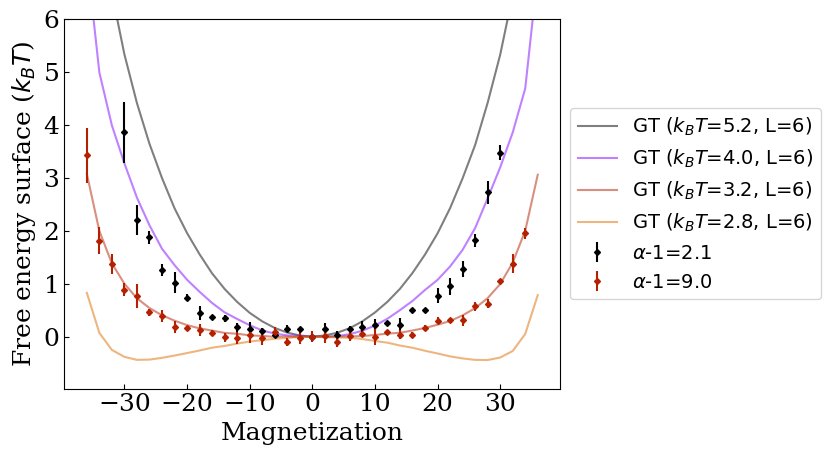

In [50]:
for i, T in enumerate([5.2, 4.0, 3.2, 2.8]):
    # if T in [8.0]:
    #     continue
    baseline = Reference_dict_latt6[T][1][np.where(Reference_dict_latt6[T][0]==0.)]
    plt.plot(Reference_dict_latt6[T][0], Reference_dict_latt6[T][1]-baseline, label=r"GT ($k_BT$=%.1f, L=6)"%(T), c=colors[i], alpha=0.5)
'''
diffstep = 9
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)
'''
diffstep = 18
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

diffstep=79
baseline = Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1][np.where(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][0], Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict["Flow"][list(Pred_dict["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

setfigform_simple("Magnetization", "Free energy surface ($k_BT$)", ylimit=(None, 6))
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

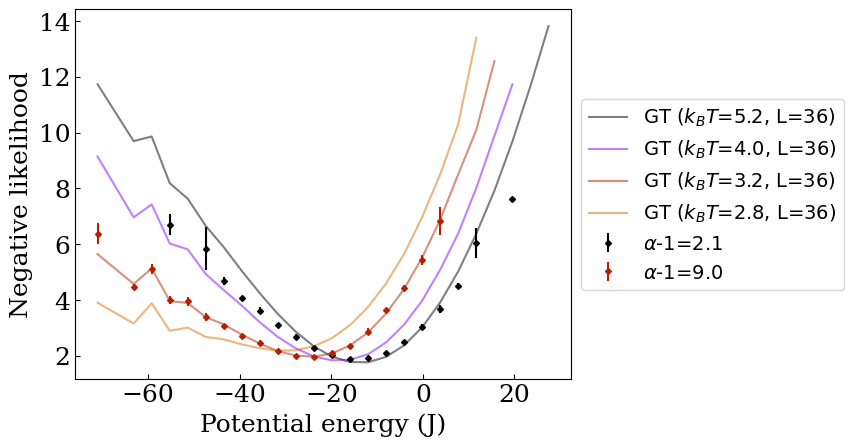

In [51]:
for i, T in enumerate([5.2, 4.0, 3.2, 2.8]):
    # if T in [8.0]:
    #     continue
    plt.plot(Reference_dict_potE_latt6[T][0], Reference_dict_potE_latt6[T][1], label=r"GT ($k_BT$=%.1f, L=36)"%(T), c=colors[i], alpha=0.5)
'''
diffstep = 9
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)
'''
diffstep = 18
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

diffstep = -1
plt.errorbar(Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0], Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict["Flow-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

setfigform_simple("Potential energy (J)", "Negative likelihood")
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [52]:
Pred_dict["FlowExpectations-PotE"] = []
for diffstep in range(80):
    Jac_Expectation = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]
    var_Prob = Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][2]**2
    err_Expectation = np.sqrt(Jac_Expectation*var_Prob*Jac_Expectation).sum()
    Pred_dict["FlowExpectations-PotE"].append([list(Pred_dict["Flow-PotE"].keys())[diffstep],(Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][1]*Pred_dict["FlowProbs-PotE"][list(Pred_dict["Flow-PotE"].keys())[diffstep]][0]).sum(), err_Expectation])

Pred_dict["FlowExpectations-PotE"] = np.array(Pred_dict["FlowExpectations-PotE"])

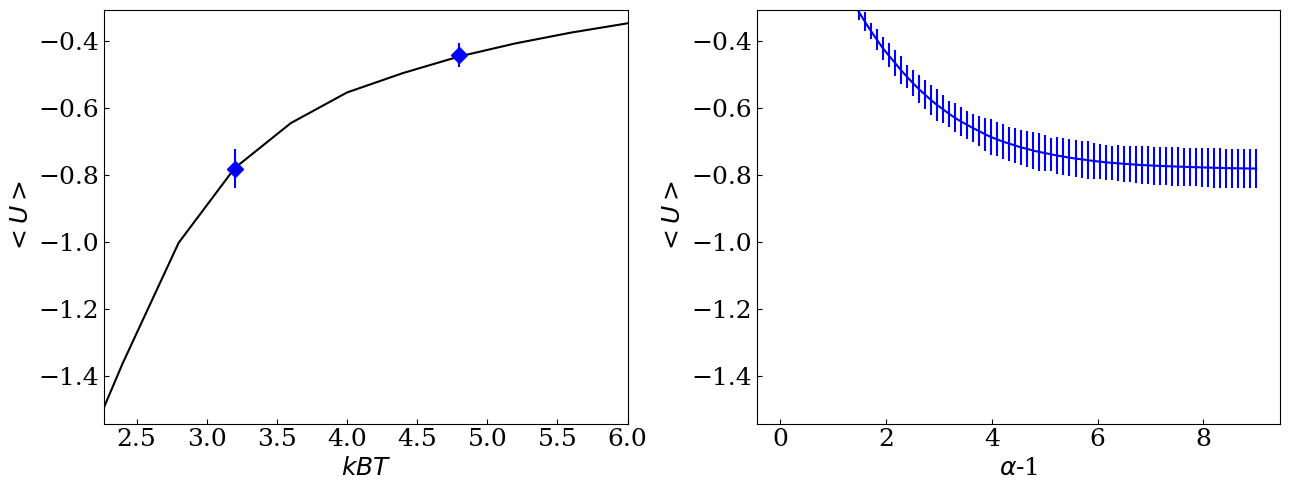

In [53]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(Expectation_Reference_dict_latt6["PotE"][:,0], Expectation_Reference_dict_latt6["PotE"][:,1]/6**2, c="k")
plt.errorbar(4.8, Pred_dict["FlowExpectations-PotE"][18,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][18,2]/6**2, c="blue", fmt="D", ms=8)
plt.errorbar(3.2, Pred_dict["FlowExpectations-PotE"][-1,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][-1,2]/6**2, c="blue", fmt="D", ms=8)
plt.xlim((2/np.log(1+np.sqrt(2)),6))
plt.ylim((-2000/36**2,-400/36**2))
setfigform_simple("$kBT$", "$<U>$")
plt.subplot(122)
plt.errorbar(Pred_dict["FlowExpectations-PotE"][:,0], Pred_dict["FlowExpectations-PotE"][:,1]/6**2, yerr=Pred_dict["FlowExpectations-PotE"][:,2]/6**2, c="blue", fmt="-")
setfigform_simple(r"$\alpha$-1", "$<U>$")
plt.ylim((-2000/36**2,-400/36**2))
plt.tight_layout()

## Lattice size = 36x36
$\alpha=0.5, \alpha=1.0, \alpha=9.0$

In [54]:
ref_dirname = "/nfs/scistore14/chenggrp/ptuo/NeuralRG/data/ising-latt%dx%d-T4.0/latt%dx%d/"%(36,36,36,36)
Reference_dict_latt36 = ReadReferenceF(os.path.join(ref_dirname, "F-MAGN-REF.dat"))
Reference_dict_potE_latt36 = ReadReferenceF_potE(os.path.join(ref_dirname, "F-E-REF.dat"))


In [55]:
Pred_dict_latt36 = {}
Pred_dict_latt36["Lattice_dim"] = (36,36)
Pred_dict_latt36["Flow"] = ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-MAGN-smoothed.dat")

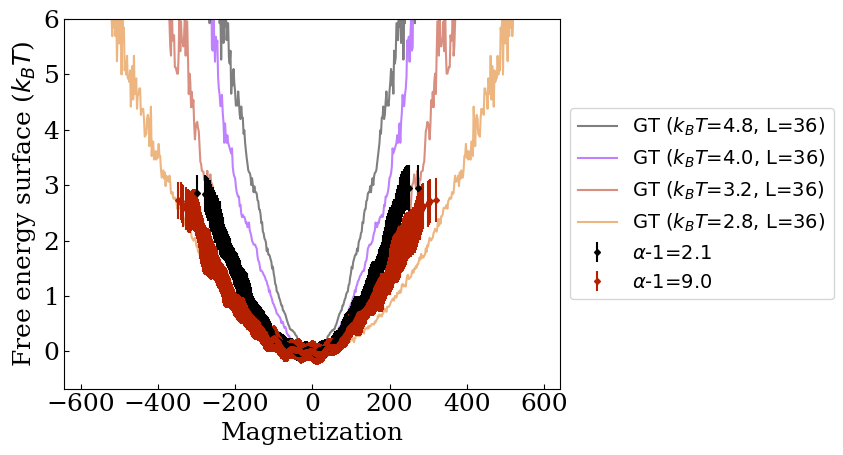

In [56]:
for i, T in enumerate([4.8, 4.0, 3.2, 2.8]):
    # if T in [8.0]:
    #     continue
    baseline = Reference_dict_latt36[T][1][np.where(Reference_dict_latt36[T][0]==0.)]
    plt.plot(Reference_dict_latt36[T][0], Reference_dict_latt36[T][1]-baseline, label=r"GT ($k_BT$=%.1f, L=36)"%(T), c=colors[i], alpha=0.5)

diffstep = 18
baseline = Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][1][np.where(Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][0], Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict_latt36["Flow"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

diffstep = -1
baseline = Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][1][np.where(Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][0]==0.)]
plt.errorbar(Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][0], Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][1]-baseline, yerr=Pred_dict_latt36["Flow"][list(Pred_dict_latt36["Flow"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict_latt36["Flow"].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

setfigform_simple("Magnetization", "Free energy surface ($k_BT$)", ylimit=(None, 6))
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [57]:
Pred_dict_latt36["Flow-PotE"] = [ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/FES-E.dat")]
for i in range(2,6):
    Pred_dict_latt36["Flow-PotE"].append(ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0_sample%d/FES-E.dat"%i))
Pred_dict_latt36["FlowProbs-PotE"] = [ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0/PROB-E.dat")]
Pred_dict_latt36["FlowProbs-PotE"].append( ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0_sample2/PROB-E.dat"))
Pred_dict_latt36["FlowProbs-PotE"].append( ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0_sample3/PROB-E.dat"))
Pred_dict_latt36["FlowProbs-PotE"].append( ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0_sample4/PROB-E.dat"))
Pred_dict_latt36["FlowProbs-PotE"].append( ReadPredF("logs-dir-ising/latt6x6T3.2/kernel3x3_timeembed_symmetrized/clsfreeG/val_baseline_latt36x36/epoch159_IntStep80_AMax10_clspd1.0_scoreG0.0_sample5/PROB-E.dat"))


In [58]:
diffstep_list = list(Pred_dict_latt36["FlowProbs-PotE"][0].keys())
assert diffstep_list == list(Pred_dict_latt36["FlowProbs-PotE"][1].keys())
assert diffstep_list == list(Pred_dict_latt36["FlowProbs-PotE"][2].keys())
assert diffstep_list == list(Pred_dict_latt36["FlowProbs-PotE"][3].keys())
assert diffstep_list == list(Pred_dict_latt36["FlowProbs-PotE"][4].keys())

In [59]:


prob_E_list = []
for diffstep in range(80):
    # Jac_Expectation = Pred_dict_latt36["FlowProbs-PotE"][list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]][0]
    # var_Prob = Pred_dict_latt36["FlowProbs-PotE"][list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]][2]**2
    # err_Expectation = np.sqrt(Jac_Expectation*var_Prob*Jac_Expectation).sum()
    prob_E_list.append([])
    for i in range(5):
        prob_E_list[-1].append(Pred_dict_latt36["FlowProbs-PotE"][i][diffstep_list[diffstep]][1])

prob_E_list = np.array(prob_E_list)
print(prob_E_list.shape)

(80, 5, 2269)


In [60]:

def calculateError(free_energys_list_, num_samples=4):
    free_energys_list_ = np.array(free_energys_list_)
    std_free = np.std(free_energys_list_, axis=0)
    standard_error = std_free / np.sqrt(num_samples)
    t_critical = 1.96
    margin_of_error = t_critical * standard_error
    free_energies = np.mean(free_energys_list_, axis=0)
    return free_energies, margin_of_error

_, err1 = calculateError(prob_E_list[40][:2], num_samples=2)
print(err1.max(), err1.min(), err1.mean())
_, err2 = calculateError(prob_E_list[40][:3], num_samples=3)
print(err2.max(), err2.min(), err2.mean())
_, err3 = calculateError(prob_E_list[40][:4], num_samples=4)
print(err3.max(), err3.min(), err3.mean())
_, err4 = calculateError(prob_E_list[40][:5], num_samples=5)
print(err4.max(), err4.min(), err4.mean())

0.0032144356117415804 0.0 3.5491437247778806e-05
0.0027076762779906704 0.0 3.861008388565678e-05
0.002256162796422296 0.0 3.610773159280173e-05
0.0018216304870158453 0.0 3.2707578149391755e-05


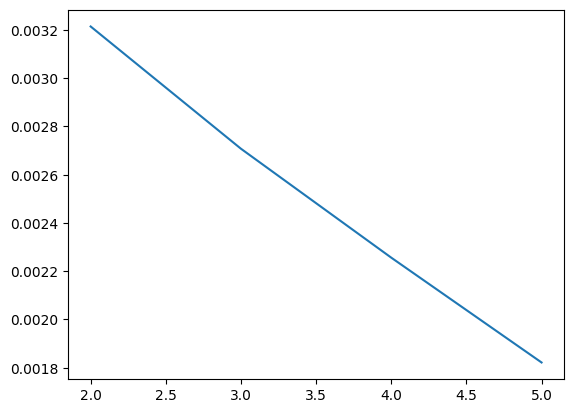

In [61]:
plt.plot([2,3,4,5], [err1.max(), err2.max(), err3.max(), err4.max()])

In [62]:
Pred_dict_latt36["FlowExpectations-PotE"] = []
for diffstep in range(80):
    Jac_Expectation = Pred_dict_latt36["FlowProbs-PotE"][0][diffstep_list[diffstep]][0]
    avg_Prob, err_Prob = calculateError(prob_E_list[diffstep], num_samples=5)
    var_Prob = err_Prob**2
    err_Expectation = np.sqrt(Jac_Expectation*var_Prob*Jac_Expectation).sum()
    Expectation = (avg_Prob*Pred_dict_latt36["FlowProbs-PotE"][0][diffstep_list[diffstep]][0]).sum()
    Pred_dict_latt36["FlowExpectations-PotE"].append([diffstep_list[diffstep], Expectation, err_Expectation])

Pred_dict_latt36["FlowExpectations-PotE"] = np.array(Pred_dict_latt36["FlowExpectations-PotE"])
print(Pred_dict_latt36["FlowExpectations-PotE"].shape)

(80, 3)


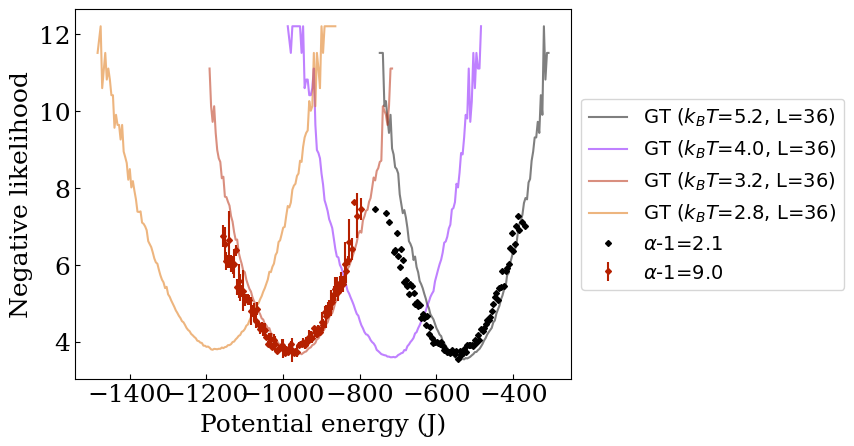

In [63]:
for i, T in enumerate([5.2, 4.0, 3.2, 2.8]):
    plt.plot(Reference_dict_potE_latt36[T][0], Reference_dict_potE_latt36[T][1], label=r"GT ($k_BT$=%.1f, L=36)"%(T), c=colors[i], alpha=0.5)

diffstep = 18
# plt.errorbar(Pred_dict_latt36["Flow-PotE"][list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]][0], Pred_dict_latt36["Flow-PotE"][list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]][1], yerr=Pred_dict_latt36["Flow-PotE"][list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict_latt36["Flow-PotE"].keys())[diffstep]), linestyle='none', c=colors[0], marker="D", ms=3)

for i in range(1):
    plt.errorbar(Pred_dict_latt36["Flow-PotE"][i][list(Pred_dict_latt36["Flow-PotE"][i].keys())[diffstep]][0], Pred_dict_latt36["Flow-PotE"][i][list(Pred_dict_latt36["Flow-PotE"][i].keys())[diffstep]][1], label=r"$\alpha$-1=%.1f"%(list(Pred_dict_latt36["Flow-PotE"][i].keys())[diffstep]), linestyle='none', c=colors[i], marker="D", ms=3)

diffstep = -1
plt.errorbar(Pred_dict_latt36["Flow-PotE"][0][list(Pred_dict_latt36["Flow-PotE"][0].keys())[diffstep]][0], Pred_dict_latt36["Flow-PotE"][0][list(Pred_dict_latt36["Flow-PotE"][0].keys())[diffstep]][1], yerr=Pred_dict_latt36["Flow-PotE"][0][list(Pred_dict_latt36["Flow-PotE"][0].keys())[diffstep]][2], label=r"$\alpha$-1=%.1f"%(list(Pred_dict_latt36["Flow-PotE"][0].keys())[diffstep]), linestyle='none', c=colors[2], marker="D", ms=3)

setfigform_simple("Potential energy (J)", "Negative likelihood")
plt.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

In [64]:
Expectation_Reference_dict_latt36 = {}
Expectation_Reference_dict_latt36["PotE"] = np.loadtxt(os.path.join(ref_dirname, "Expectation-E-REF.dat"), skiprows=1)

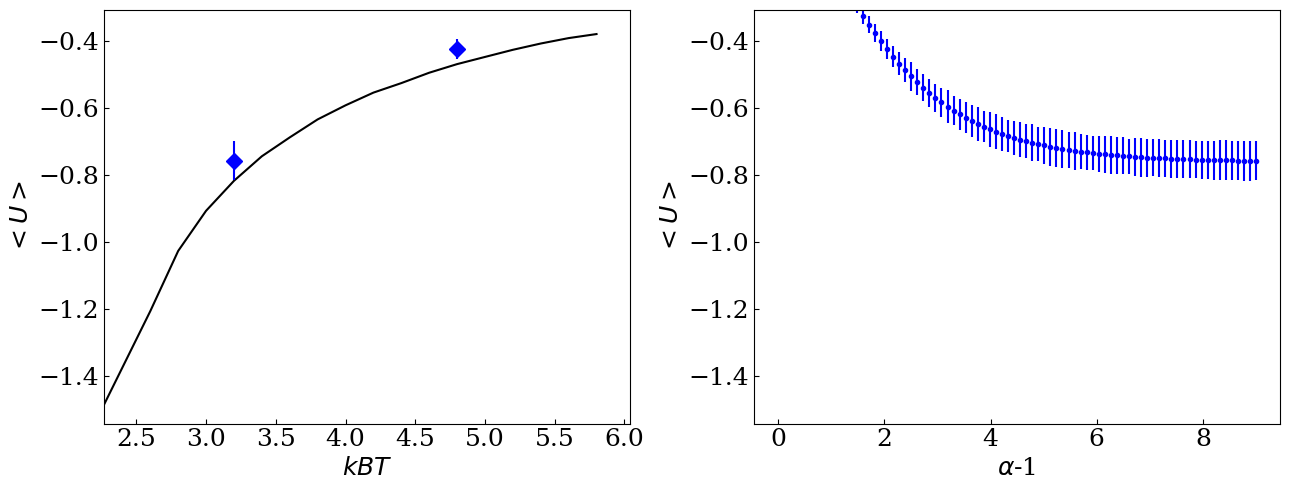

In [65]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(Expectation_Reference_dict_latt36["PotE"][:,0], Expectation_Reference_dict_latt36["PotE"][:,1]/36**2, c="k")
plt.errorbar(4.8, Pred_dict_latt36["FlowExpectations-PotE"][18,1]/36**2, yerr=Pred_dict_latt36["FlowExpectations-PotE"][18,2]/36**2, c="blue", fmt="D", ms=8)
plt.errorbar(3.2, Pred_dict_latt36["FlowExpectations-PotE"][-1,1]/36**2, yerr=Pred_dict_latt36["FlowExpectations-PotE"][-1,2]/36**2, c="blue", fmt="D", ms=8)
plt.xlim((2/np.log(1+np.sqrt(2)),None))
plt.ylim((-2000/36**2,-400/36**2))
setfigform_simple("$kBT$", "$<U>$")
plt.subplot(122)
plt.errorbar(Pred_dict_latt36["FlowExpectations-PotE"][:,0], Pred_dict_latt36["FlowExpectations-PotE"][:,1]/36**2, yerr=Pred_dict_latt36["FlowExpectations-PotE"][:,2]/36**2, c="blue", fmt="o", ms=3)
setfigform_simple(r"$\alpha$-1", "$<U>$")
plt.ylim((-2000/36**2,-400/36**2))
plt.tight_layout()